# Análise Exploratória de Dados

## Carregando Base de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter

c:\Users\hyggo\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_churn = pd.read_csv('../data/customer_churn_telecom_services.csv')

## Visualizaçao Inicial

In [3]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


## Limpeza básica

Verificar colunas identificadoras

In [5]:
# Seleciona as colunas que todos valores da coluna são únicos, ou seja, número de ocorrência de valores únicos igual a número de ocorrência de valores
col_iden = [col for col in df_churn.columns if df_churn[col].nunique() == df_churn[col].notna().sum()]
if col_iden:
    print("Colunas identificadoras detectadas:", col_iden)
else:
    print("Nenhuma coluna identificadora detectada.")

Nenhuma coluna identificadora detectada.


Verificar linhas duplicadas

In [6]:
num_dupli = df_churn.duplicated().sum()
print("Número de linhas duplicadas:", num_dupli)

Número de linhas duplicadas: 22


In [7]:
df_churn[df_churn.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


Por não existir colunas identificadoras foi considerado quem as linhas duplicadas são ocorrências reais com características iguais, por isso foram mantidas.

Verificar linhas com valores nulos

In [8]:
df_churn[df_churn.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


A única coluna que possue valores nulos é a de 'TotalCharges' e após uma análise desses valores nulos foi possível identificar que todos ocorrem quando a coluna 'tenure' é 0, então foi considerado que quando o cliente está no primeiro mês (tenure = 0) e ainda não foi gerada a primeira fatura o 'TotalCharges' ainda é nulo, mas para nossa análise podemos considerá-lo como 0.

In [9]:
df_churn.loc[df_churn['tenure'] == 0, 'TotalCharges'] = 0

## Visualizaçao das colunas

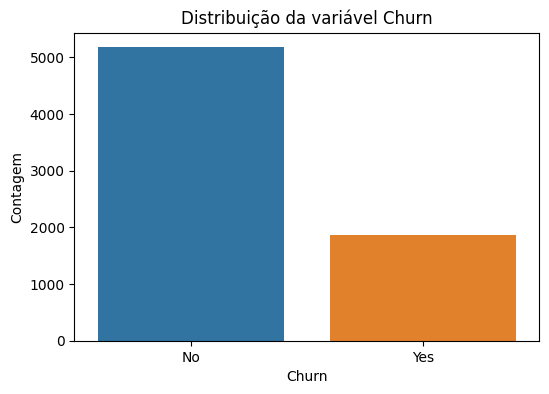

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(
    x="Churn",
    hue="Churn",
    data=df_churn,
    palette="tab10",      
    legend=False          
)
plt.title("Distribuição da variável Churn")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()


Possível notar grande predominância de não evasão(Churn) nos contratos presentes nessa base de dados.

In [11]:
df_churn["MonthlyCharges_group"] = pd.cut(df_churn["MonthlyCharges"],
                                bins=[0, 35, 70, 90,120],
                                labels=["0-35", "35-70", "70-90", "90-120"],
                                right=True)

Realização de um agrupamento por faixas de Pagamento Mensal para tentar obter mais informações.

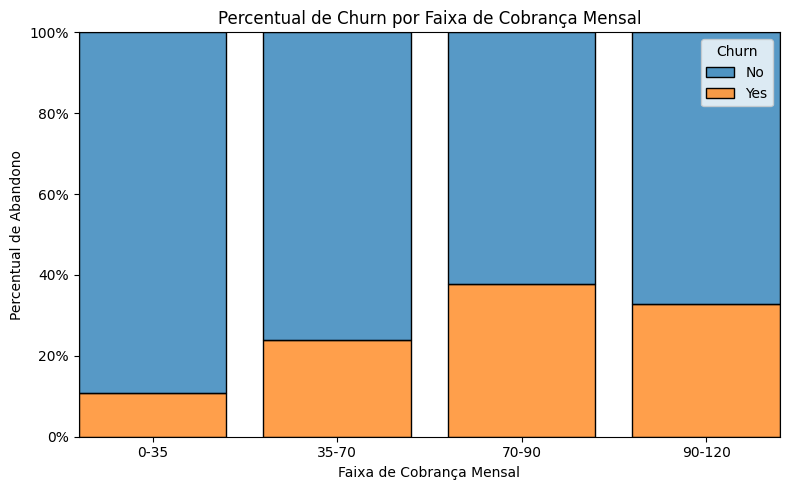

In [12]:

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_churn,
    x="MonthlyCharges_group",
    hue="Churn",
    multiple="fill",
    palette="tab10",
    shrink=0.8,
    legend=True
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Percentual de Churn por Faixa de Cobrança Mensal")
plt.xlabel("Faixa de Cobrança Mensal")
plt.ylabel("Percentual de Abandono")
plt.tight_layout()
plt.show()


Possivel notar que nas faixa de valores mais altos a % de abandono do contrato é maior.

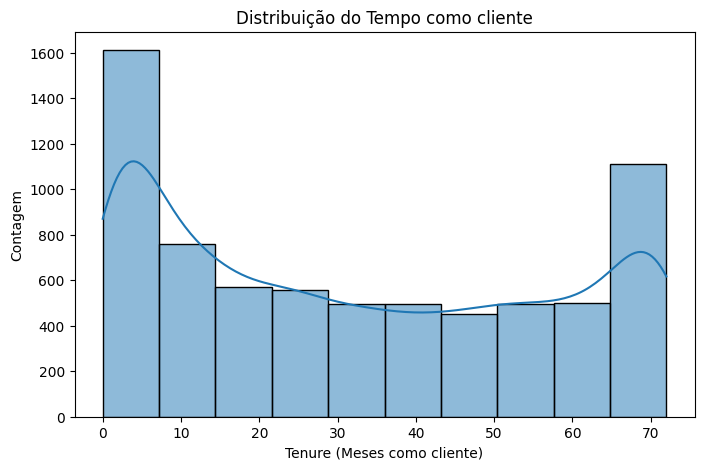

In [13]:
plt.figure(figsize=(8, 5)) 
sns.histplot(
    data=df_churn, 
    x="tenure", 
    bins=10,    
    kde=True    
)


plt.title("Distribuição do Tempo como cliente") 
plt.xlabel("Tenure (Meses como cliente)")                            
plt.ylabel("Contagem")                           


plt.show() 

Realização de um agrupamento por faixas de Tempo como Cliente para tentar obter mais informações.

In [14]:
df_churn["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [15]:
df_churn["Tenure_group"] = pd.cut(df_churn["tenure"],
                                bins=[0, 9, 29, 55,72],
                                labels=["0-9", "9-29", "29-55", "55-72"],
                                right=True)

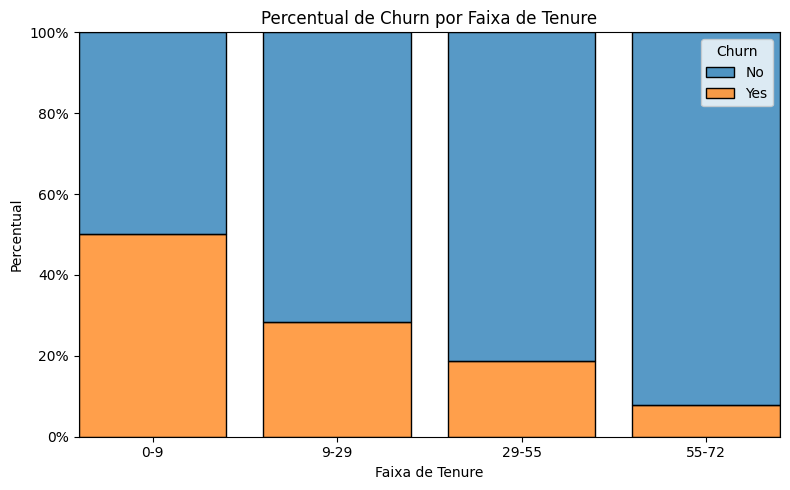

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_churn,
    x="Tenure_group",
    hue="Churn",
    multiple="fill",
    palette="tab10",
    shrink=0.8,
    legend=True
)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Percentual de Churn por Faixa de Tenure")
plt.xlabel("Faixa de Tenure")
plt.ylabel("Percentual")
plt.tight_layout()
plt.show()


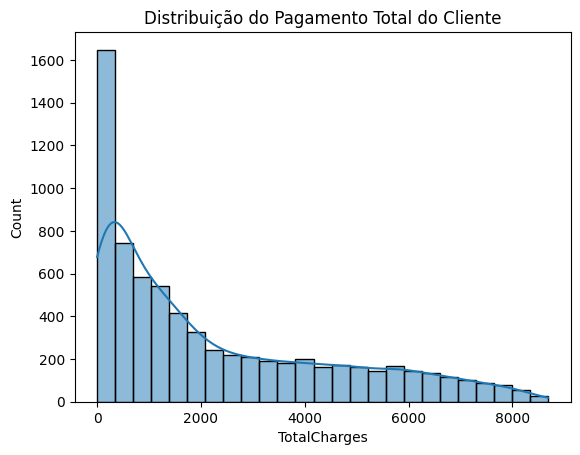

In [17]:
sns.histplot(df_churn['TotalCharges'], kde=True)
plt.title('Distribuição do Pagamento Total do Cliente')
plt.show()


=== Análise da Coluna: gender ===


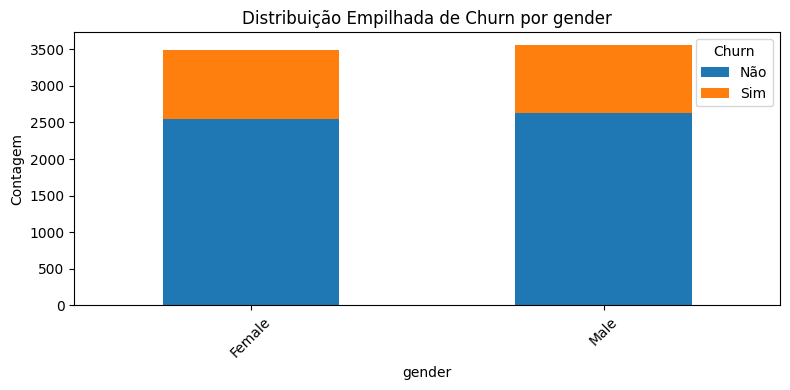


=== Análise da Coluna: Partner ===


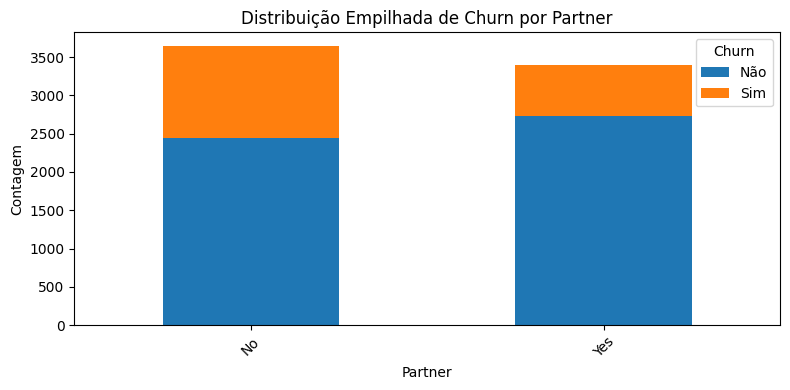


=== Análise da Coluna: Dependents ===


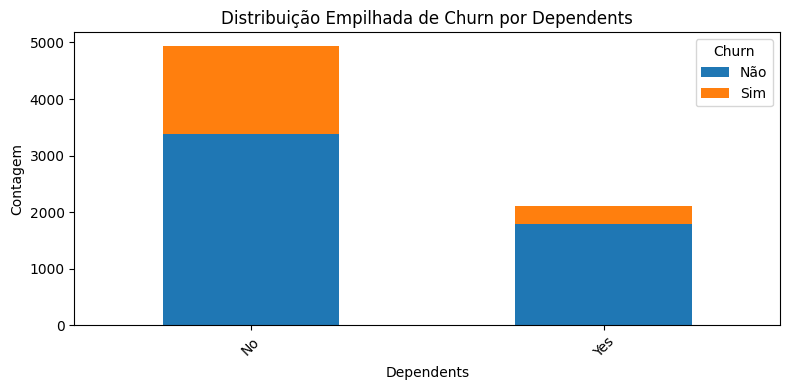


=== Análise da Coluna: PhoneService ===


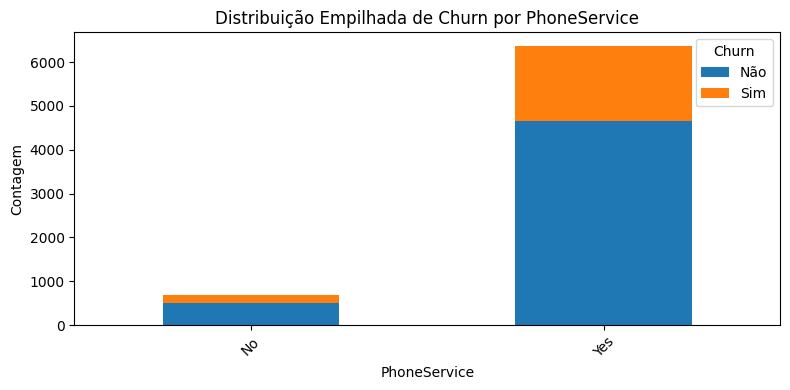


=== Análise da Coluna: MultipleLines ===


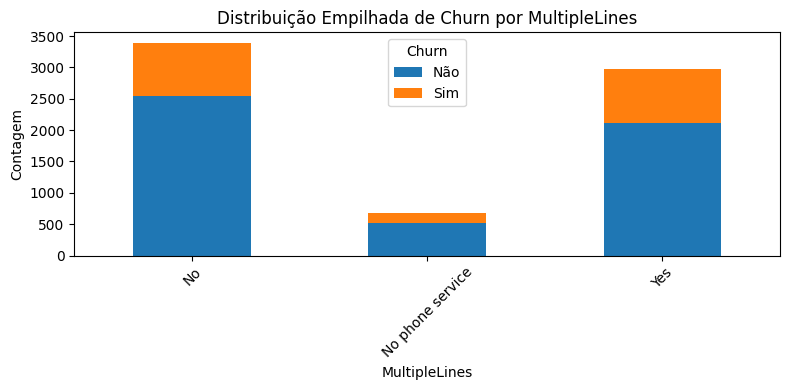


=== Análise da Coluna: InternetService ===


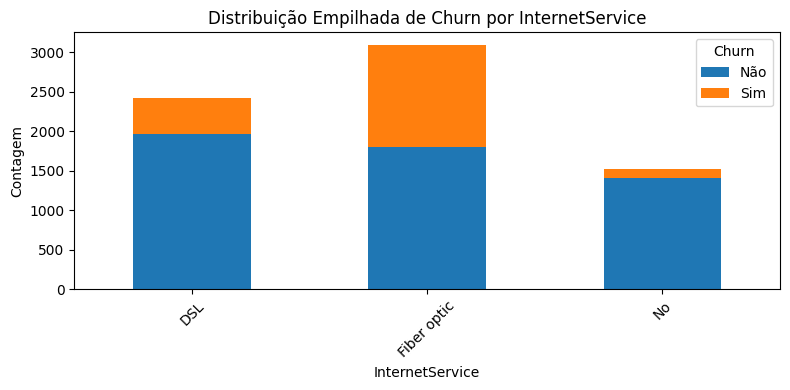


=== Análise da Coluna: OnlineSecurity ===


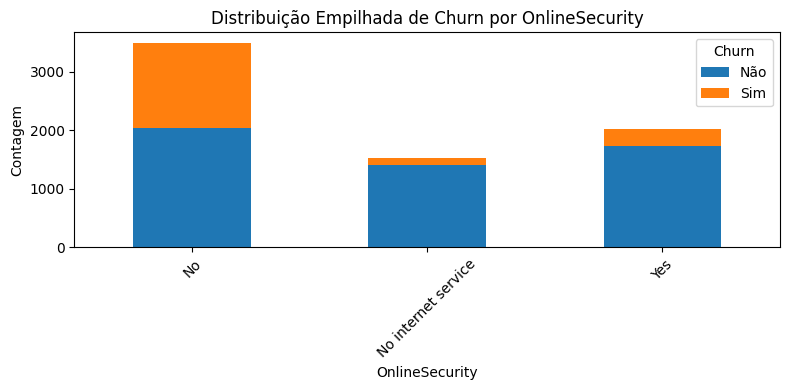


=== Análise da Coluna: OnlineBackup ===


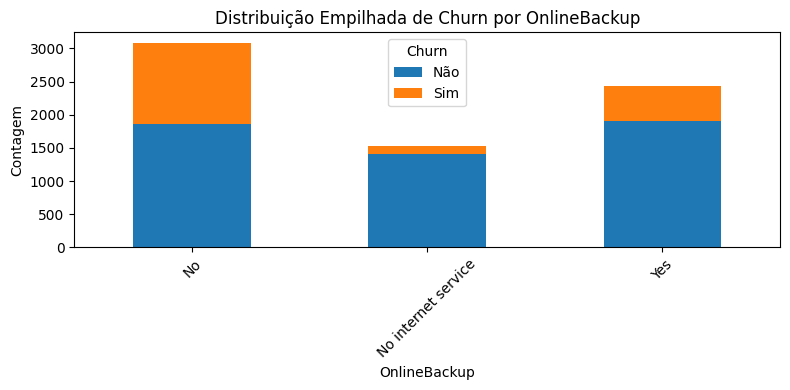


=== Análise da Coluna: DeviceProtection ===


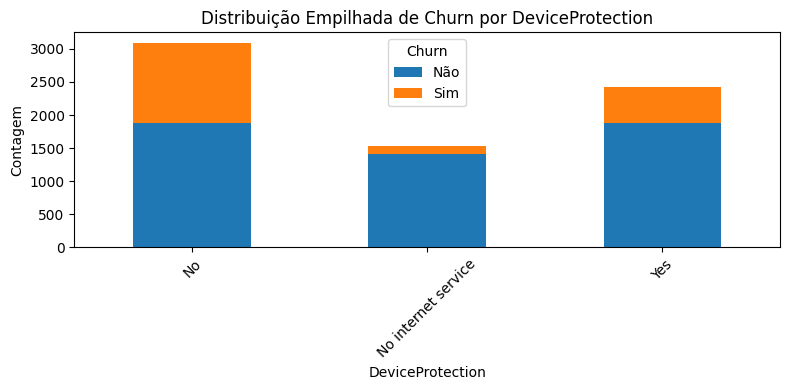


=== Análise da Coluna: TechSupport ===


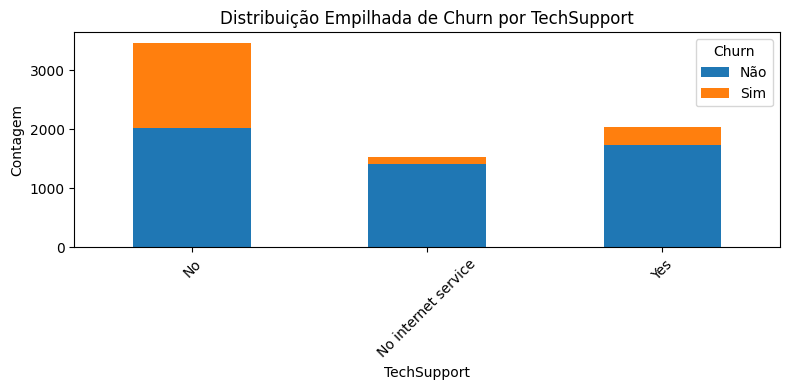


=== Análise da Coluna: StreamingTV ===


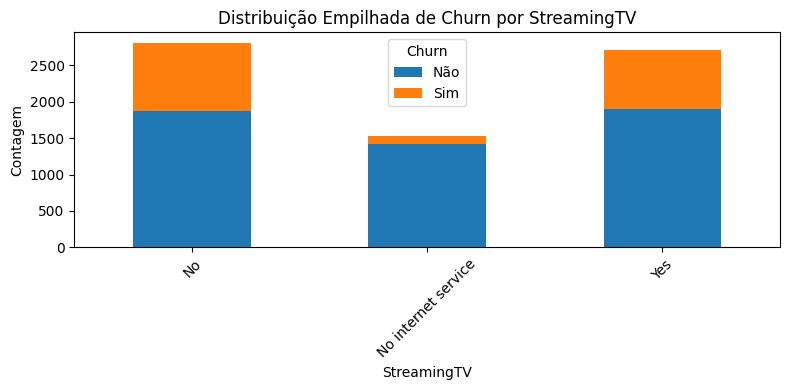


=== Análise da Coluna: StreamingMovies ===


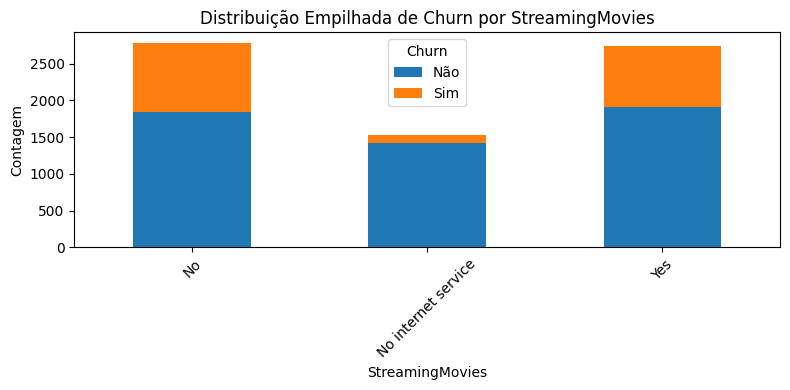


=== Análise da Coluna: Contract ===


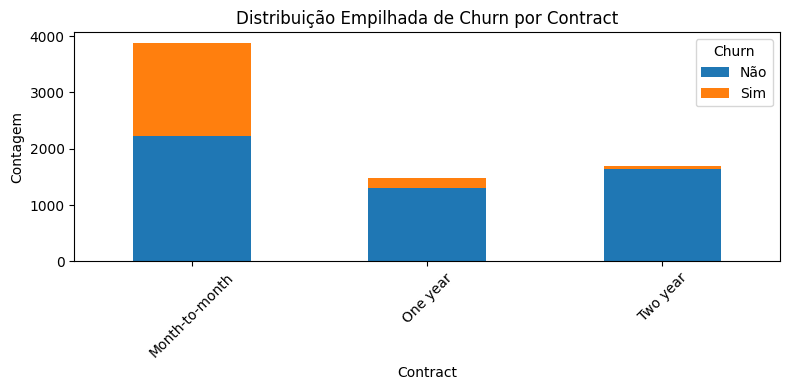


=== Análise da Coluna: PaperlessBilling ===


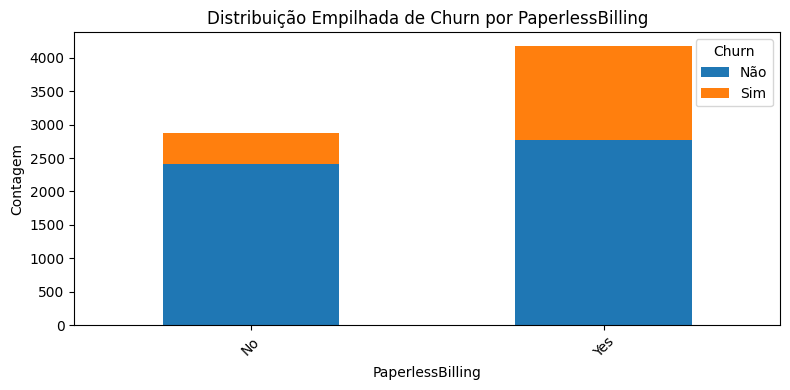


=== Análise da Coluna: PaymentMethod ===


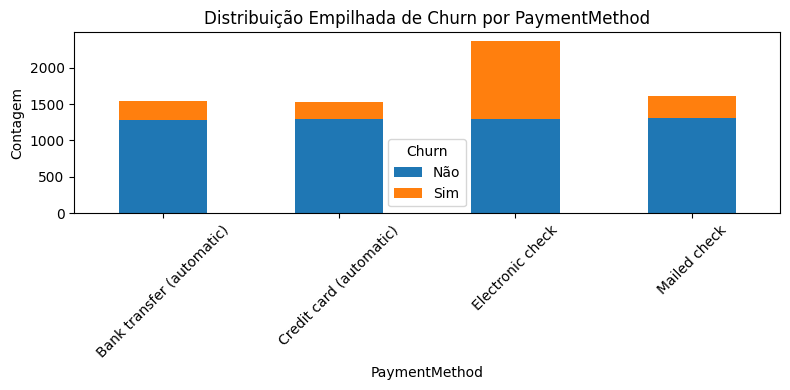


=== Análise da Coluna: MonthlyCharges_group ===


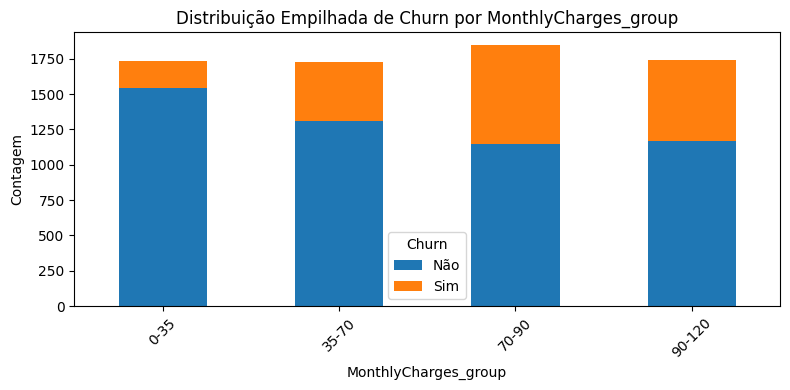


=== Análise da Coluna: Tenure_group ===


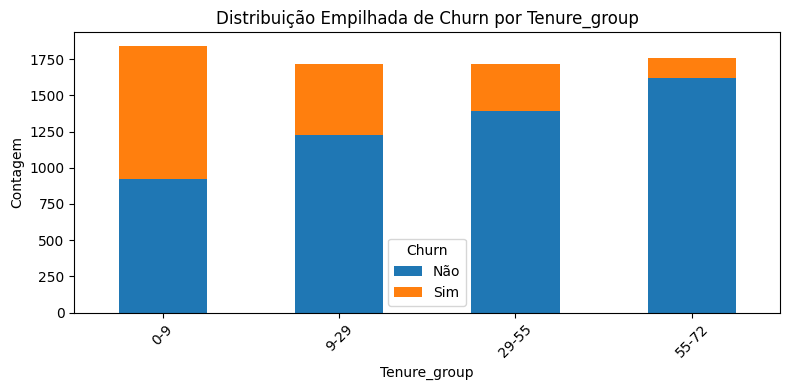

In [18]:
# Seleciona as colunas categóricas (exceto a coluna target, se necessário)
categorical_cols = df_churn.select_dtypes(include=['object', 'category']).columns.drop('Churn', errors='ignore')

for col in categorical_cols:
    print(f"\n=== Análise da Coluna: {col} ===")
    
    # Cria uma tabela de contingência entre a coluna categórica e o target Churn
    crosstab = pd.crosstab(df_churn[col], df_churn['Churn'])
    
    # Plota o gráfico de barras empilhadas
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 4))
    plt.title(f'Distribuição Empilhada de Churn por {col}')
    plt.xlabel(col)
    plt.ylabel("Contagem")
    plt.xticks(rotation=45)
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.tight_layout()
    plt.show()

É possível ver uma menor porcentagem de abandono em perfis de clientes com parceiros e o mesmo em clientes com dependentes.
Alguns opcionais também parecem ter uma relação com o abandono como: InternetService como DSL, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport. Já serviços como Streaming de TV ou Filmes não parecem ter grande influência.
O tipo de contrato parece ter bastante influencia no abandono, sendo a grande maioria no contrato mês a mês.

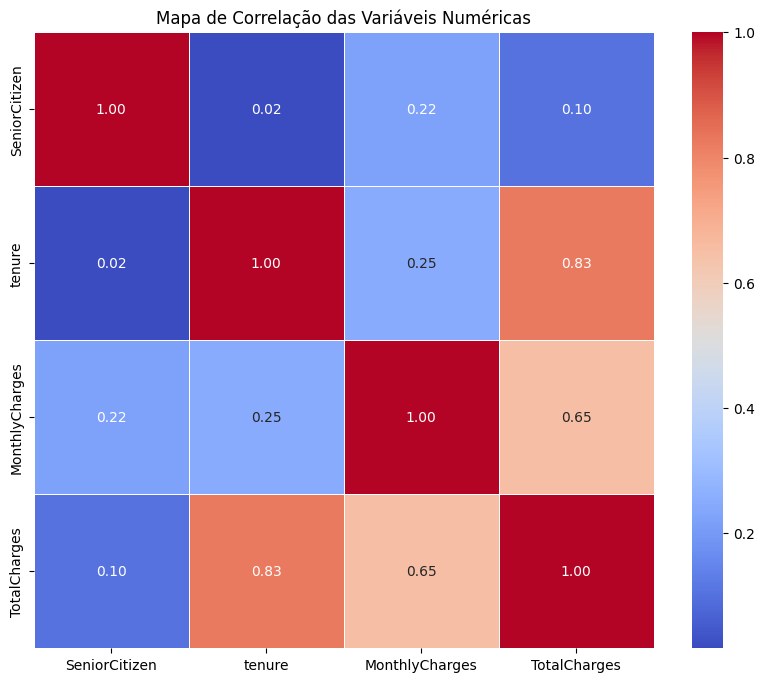

In [19]:


# Supondo que seu DataFrame seja df
# Selecionar somente colunas numéricas
df_numericas = df_churn.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = df_numericas.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()


Única grande correção é com tenure e monthlyCharges com TotalCharges o que faz total sentido por serem as maiores influências na cobrança total, o tempo como cliente x o pagamento mensal.